# Pymaceuticals Inc.
---

### Analysis

- Analysis showed that the Ramicane drug more than likely has a better success rate with the lowest mean rate but on the other hand the Ketapril drug saw the worst mean rate which suggests less success.
- Analysis showed that there was a coorlation between the mouse weight and the size of the tumor within the Copomulin data set.
- Analysis also showed that the vast majority of the mices fell within the quartiale ranges expect for one potential outliner identified within the Infubinol drug data set.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989", :]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df =  combined_mouse_df[combined_mouse_df['Mouse ID'].isin(dup_mice_ID)==False]
cleaned_mouse_df.head() 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = cleaned_mouse_df.groupby("Drug Regimen")
mean_tumor_vol = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_vol = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_data['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": variance_tumor_vol,
    "Tumor Volume Std. Dev.": std_dev_tumor_vol,
    "Tumor Volume SEM": sem_tumor_vol
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
)
summary_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

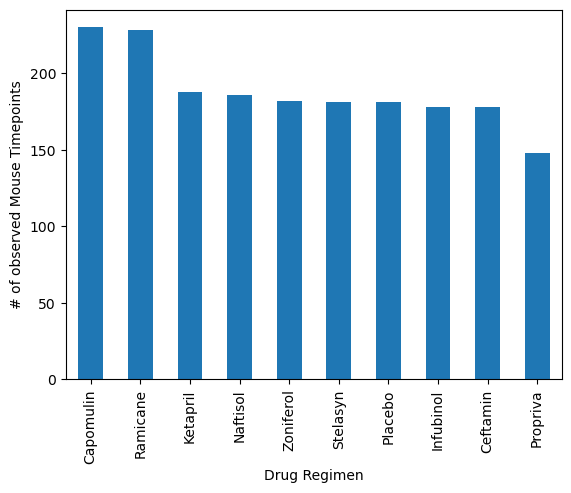

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = cleaned_mouse_df["Drug Regimen"].value_counts()

#regimen.plot(kind="bar")
plot = regimen.plot.bar()
plot.set_xlabel("Drug Regimen")
plot.set_ylabel("# of observed Mouse Timepoints")


<function matplotlib.pyplot.show(close=None, block=None)>

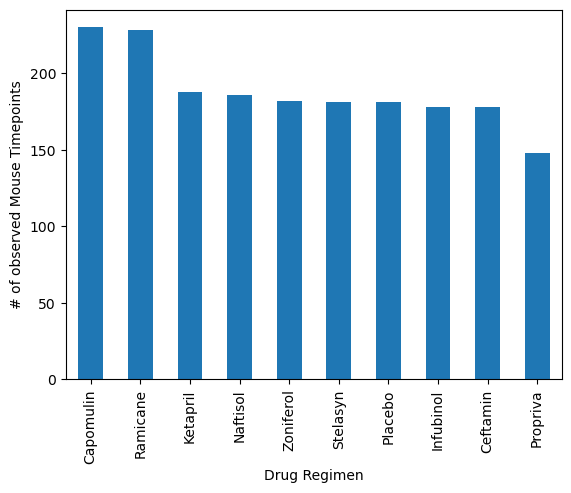

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = cleaned_mouse_df["Drug Regimen"].value_counts()

figure_1 = regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.tight_layout
plt.show


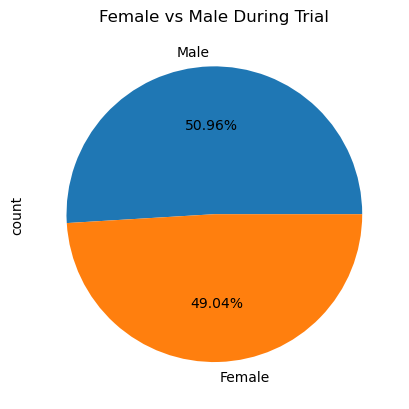

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
Sex = cleaned_mouse_df["Sex"].value_counts()

# Make the pie chart
#Sex.plot(kind="pie", autopct='%1.1f%%')
plot = Sex.plot.pie(y="Sex", autopct='%1.2f%%', title = "Female vs Male During Trial")


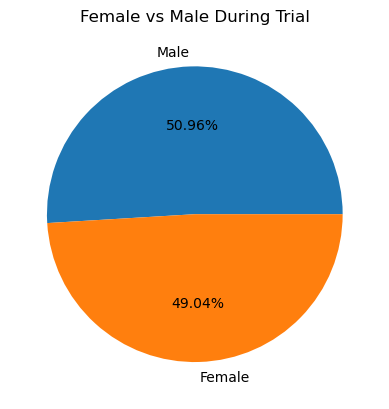

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
x = cleaned_mouse_df["Sex"].value_counts()
labels = x.index



# Make the pie chart
fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%.2f%%')
ax.set_title("Female vs Male During Trial")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'].isin(regimens_of_interest)]
total_tumor = filtered.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = cleaned_mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint_per_mouse, cleaned_mouse_df, on=['Mouse ID', 'Timepoint'])
last_timepoint_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

max_timepoints_df = pd.DataFrame(cleaned_mouse_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
merged_df = pd.merge(cleaned_mouse_df, max_timepoints_df, on='Mouse ID')

# List of drug regimens to analyze
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to store tumor volume data
tumor_volume_data = []

# Analyze each drug regimen
for regimen in drug_regimens:
    
    regimen_data = merged_df[merged_df['Drug Regimen'] == regimen]
    max_timepoint_data = regimen_data[regimen_data['Timepoint'] == regimen_data['max_timepoint']]
    tumor_volumes = max_timepoint_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    interquartile_range = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * interquartile_range)
    upper_bound = upper_quartile + (1.5 * interquartile_range)
    
    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes > upper_bound) | (tumor_volumes < lower_bound)]
    
    # Print outliers for each drug regimen
    print(f'{regimen}\'s potential outliers: {outliers.tolist()}')

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


In [19]:
#group by Mouse ID, grab the max timepoint for each Mouse ID
tumor_volume_timepoint_df = pd.DataFrame(combined_mouse_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint':'max_timepoint'})

#merge with cleaned dataframe
tumor_volume_df = pd.merge(combined_mouse_df,tumor_volume_timepoint_df,on='Mouse ID')

#list of drug names to loop through
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#empty list to append the values to for the boxplot
values = []


#loops through list of drugs
for drug in drugs:
    #create a temporary dataframe to filter down the the specific drug we are on
    current_drug = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug]
    
    #Use the temporary dataframe to get only the max timepoint for the current drug.
    final_tp = current_drug.loc[current_drug['Timepoint'] == current_drug['max_timepoint']]
    
    #declare variable cur_vals, set it to the series of Tumor Volume from our temp DataFrames
    cur_vals = final_tp['Tumor Volume (mm3)']
        
    #append the value to the values list
    values.append(cur_vals)
      
    #calculate quarties, lowerq, upperq, iqr, lower_bound, upper_bound, and outliers
    quartiles = cur_vals.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #create a list of the outliers for each drug
    outliers = [x for x in cur_vals if x > upper_bound or x < lower_bound]
    
    #print out the list of outliers for each drug
    print(f'{drug}\'s potential outliers: {outliers}')


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


Text(0.5, 1.0, 'Final Tumor Volume per Drug Regimen')

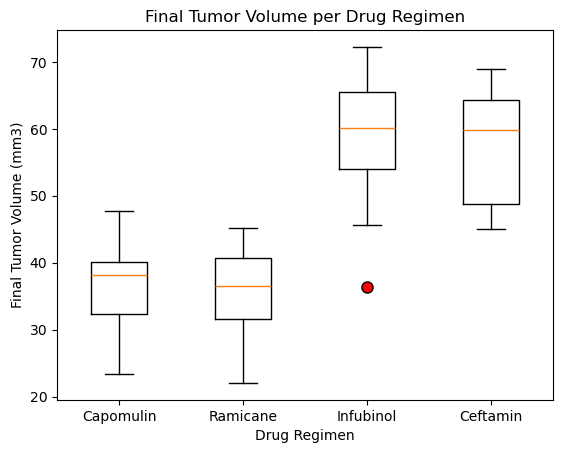

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')

fig1,ax1 = plt.subplots()

ax1.boxplot(values,flierprops=flierprops)

ax1.set_xticklabels(drugs)

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume per Drug Regimen')

## Line and Scatter Plots

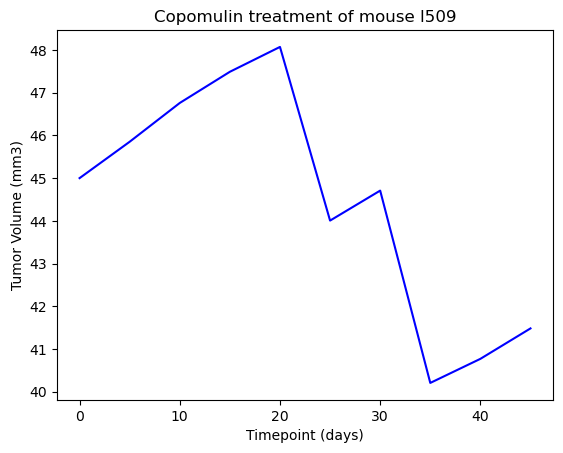

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
ig, ax = plt.subplots()
ax.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')
plt.title("Copomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

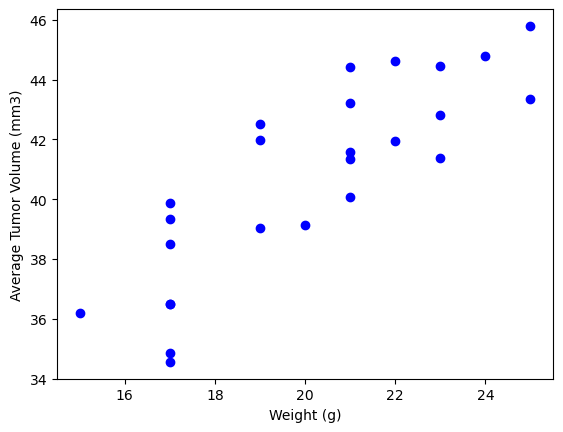

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

fig, ax = plt.subplots()
ax.scatter(mouse_weight, avg_tumor_vol, marker='o', color='b')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

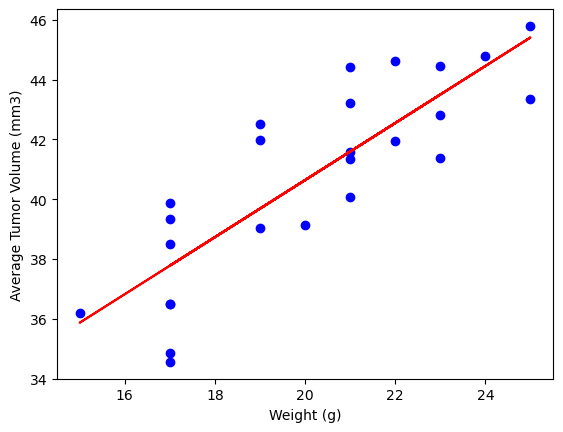

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept

fig, ax = plt.subplots()
ax.scatter(mouse_weight, avg_tumor_vol, marker='o', color='b')
ax.plot(mouse_weight, regress_values, color="r")
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

plt.show()